# Diabetes EDA
This dataset is downloaded from kaggle, representing diabetes statistics from 2015 gathered by CDC (Centers for Disease Control and Prevention, a national health agency) but revised and scaled (say sth here). At first glance, we have 22 columns and 253680 instances. Given this information, there would be a myriad of questions to be asked and analyzed. The importance of these possible questions is in the correlation between instances and one might effect another. The objective of this analysis is finding impactful elements that can reduce the risk of diabetes, increasing the potential of prevention.
#### Important Risk Factors
blood pressure (high)
cholesterol (high)
smoking
diabetes
obesity
age
sex
race
diet
exercise
alcohol consumption
BMI
Household Income
Marital Status
Sleep
Time since last checkup
Education
Health care coverage
Mental Health
#### Key objectives with questions:
1. Understanding the Dataset
   What are the key features of the dataset, and what do they represent?
   Are there any missing values or anomalies?
   What is the distribution of each feature?
2. Exploring Relationships Between Features
   For instance, Is there a relationship between Glucose levels and the outcome (diabetes/non-diabetes)?
   How does BMI impact the likelihood of diabetes?
   Are there correlations between features like Insulin, Blood Pressure, and Age?
3. Detecting Patterns and Insights
   What are the common characteristics of patients with diabetes compared to those without it?
   Are there any specific age groups or BMI ranges that are more prone to diabetes?
   Can the dataset reveal any trends in insulin levels and glucose levels among different age groups?
4. Outliers and Data Quality
   Are there any outliers in features like BMI, Glucose, and Blood Pressure that might cause distortion?
   How can these outliers be detected and handled without compromising the data?
5. Insights for Normalization or Preprocessing
   Does the data require any normalization or scaling before performing deeper analysis?
   How balanced is the Outcome variable? Are there more diabetic patients or non-diabetic patients?
6. Visualizations for Exploration
   How can visualizations like boxplots, histograms, or scatter plots help analyze the relationships between variables?
   Can we create a heatmap to see correlations between the numerical features?
7. Advanced Insights
   Could machine learning models like logistic regression or decision trees be applied to predict diabetes outcomes?
   What features contribute the most to determining whether a patient has diabetes?


## Libraries

In [2]:
from pickletools import uint8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.extras import unique
from setuptools.package_index import unique_values

## Data Extraction


Doesn't need further extraction other that reading it.

In [3]:
df = pd.read_csv("C:/Users/Ped/Downloads/Compressed/Diabetes.csv")

## Data Observation


In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [23]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,155099.000000,155099.000000,155099.000000,155099.0,155099.000000,155099.000000,155099.0,155099.000000,155099.000000,155099.000000,...,155099.0,155099.0,155099.000000,155099.000000,155099.000000,155099.00000,155099.000000,155099.000000,155099.000000,155099.000000
mean,0.304045,0.443684,0.438346,1.0,28.317062,0.428346,0.0,0.085855,0.767503,0.628160,...,1.0,0.0,2.411750,1.614788,2.053147,0.12599,0.445664,8.242529,5.059646,6.188144
std,0.704376,0.496820,0.496186,0.0,5.733645,0.494841,0.0,0.280150,0.422425,0.483298,...,0.0,0.0,0.933448,3.937081,4.562883,0.33184,0.497040,3.104734,0.955479,1.937383
min,0.000000,0.000000,0.000000,1.0,12.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.0,0.0,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,1.000000
25%,0.000000,0.000000,0.000000,1.0,24.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.00000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.0,27.000000,0.000000,0.0,0.000000,1.000000,1.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.00000,0.000000,9.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.0,31.000000,1.000000,0.0,0.000000,1.000000,1.000000,...,1.0,0.0,3.000000,1.000000,2.000000,0.00000,1.000000,11.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.0,51.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.0,0.0,5.000000,25.000000,29.000000,1.00000,1.000000,13.000000,6.000000,8.000000


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Diabetes_012: [0. 2. 1.]
HighBP: [1. 0.]
HighChol: [1. 0.]
CholCheck: [1. 0.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker: [1. 0.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: [5. 3. 2. 4. 1.]
MentHlth: [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth: [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk: [1. 0.]
Sex: [0. 1.]
Age: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3

In [8]:
min_max_dict = {"Feature": [], "Minimum": [], "Maximum": []}
for column in df.columns:
    min_max_dict["Feature"].append(column)
    min_max_dict["Minimum"].append(df[column].min())
    min_max_dict["Maximum"].append(df[column].max())
min_max_df = pd.DataFrame(min_max_dict)
print(min_max_df)

                 Feature  Minimum  Maximum
0           Diabetes_012      0.0      2.0
1                 HighBP      0.0      1.0
2               HighChol      0.0      1.0
3              CholCheck      0.0      1.0
4                    BMI     12.0     98.0
5                 Smoker      0.0      1.0
6                 Stroke      0.0      1.0
7   HeartDiseaseorAttack      0.0      1.0
8           PhysActivity      0.0      1.0
9                 Fruits      0.0      1.0
10               Veggies      0.0      1.0
11     HvyAlcoholConsump      0.0      1.0
12         AnyHealthcare      0.0      1.0
13           NoDocbcCost      0.0      1.0
14               GenHlth      1.0      5.0
15              MentHlth      0.0     30.0
16              PhysHlth      0.0     30.0
17              DiffWalk      0.0      1.0
18                   Sex      0.0      1.0
19                   Age      1.0     13.0
20             Education      1.0      6.0
21                Income      1.0      8.0


## Cleaning and normalization
In terms of datatypes, it doesn't have objects or null values, so we are left the normalization of the datasize and removing the duplicated rows. The final dataset we're going to work with is called **Final_df.**

In [9]:
print("Checking to see if it has null values:")
print(df.isnull().sum())
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Checking to see if it has null values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Number of duplicate rows: 23899


In [10]:
def remove_outliers_std(df):
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3.5 * std
        upper_bound = mean + 3.5 * std
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

cdf_no_outliers_std = remove_outliers_std(df)
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers using std method: {cdf_no_outliers_std.shape}")


Original dataset shape: (253680, 22)
Dataset shape after removing outliers using std method: (178442, 22)


In [11]:
Cdf_dropped = cdf_no_outliers_std.drop_duplicates()
print(f"Original dataset shape: {Cdf_dropped.shape}")
print(f"Cleaned dataset shape: {cdf_no_outliers_std.shape}")
Final_df = Cdf_dropped.astype('uint8')
Final_df.info()

Original dataset shape: (155099, 22)
Cleaned dataset shape: (178442, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 155099 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          155099 non-null  uint8
 1   HighBP                155099 non-null  uint8
 2   HighChol              155099 non-null  uint8
 3   CholCheck             155099 non-null  uint8
 4   BMI                   155099 non-null  uint8
 5   Smoker                155099 non-null  uint8
 6   Stroke                155099 non-null  uint8
 7   HeartDiseaseorAttack  155099 non-null  uint8
 8   PhysActivity          155099 non-null  uint8
 9   Fruits                155099 non-null  uint8
 10  Veggies               155099 non-null  uint8
 11  HvyAlcoholConsump     155099 non-null  uint8
 12  AnyHealthcare         155099 non-null  uint8
 13  NoDocbcCost           155099 non-null  uint8
 14  GenHlth         

## Data Visualization


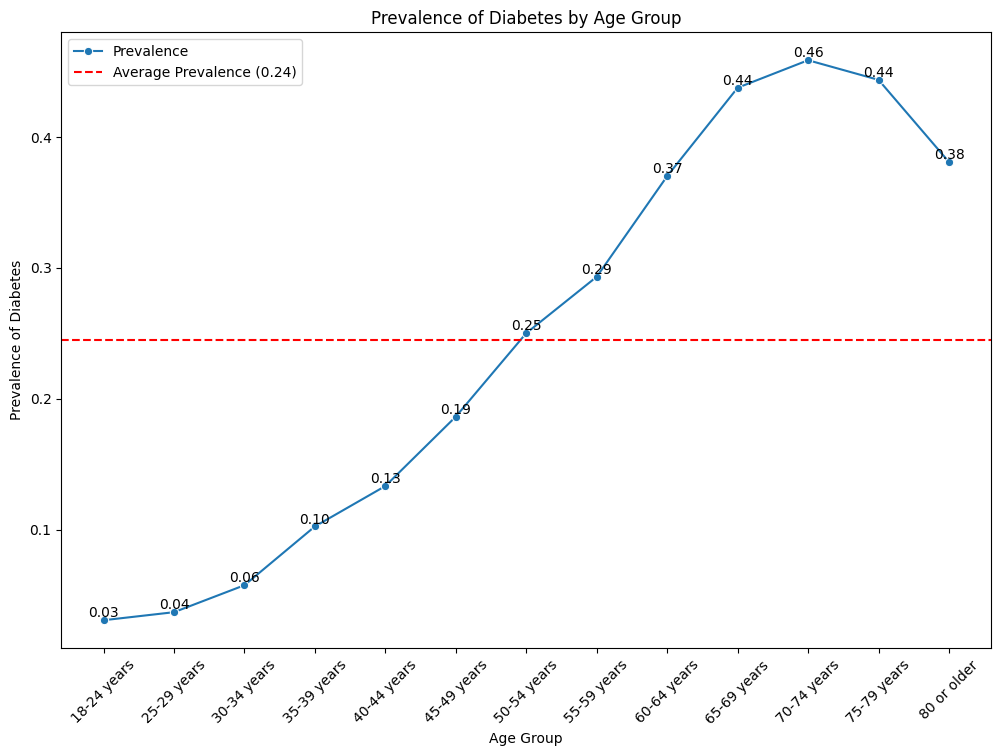

In [15]:
age_mapping = {
    1: '18-24 years',
    2: '25-29 years',
    3: '30-34 years',
    4: '35-39 years',
    5: '40-44 years',
    6: '45-49 years',
    7: '50-54 years',
    8: '55-59 years',
    9: '60-64 years',
    10: '65-69 years',
    11: '70-74 years',
    12: '75-79 years',
    13: '80 or older'
}

age_diabetes = Final_df.groupby('Age')['Diabetes_012'].mean()
age_diabetes.index = age_diabetes.index.map(age_mapping)

plt.figure(figsize=(12, 8))
sns.lineplot(x=age_diabetes.index, y=age_diabetes.values, marker='o', label='Prevalence')

for x, y in zip(age_diabetes.index, age_diabetes.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

avg_prevalence = age_diabetes.mean()
plt.axhline(avg_prevalence, color='red', linestyle='--', label=f'Average Prevalence ({avg_prevalence:.2f})')

plt.title('Prevalence of Diabetes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Prevalence of Diabetes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

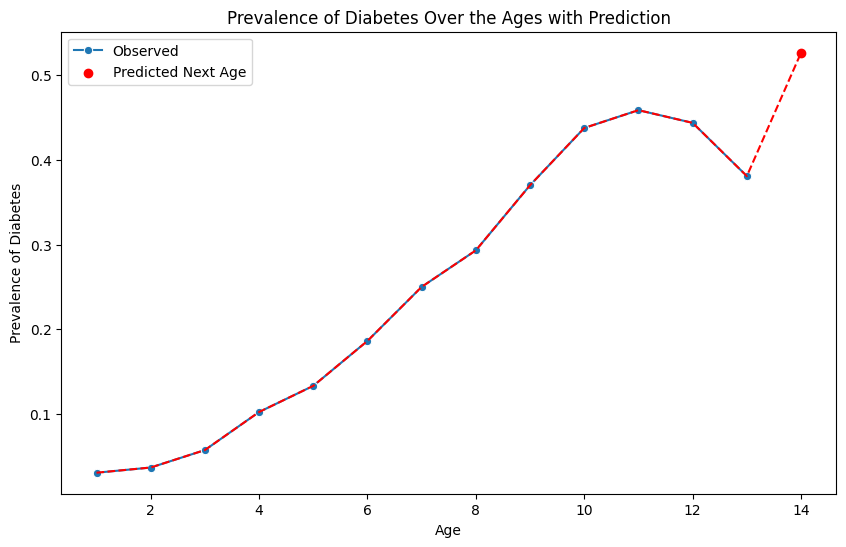

In [ ]:


from sklearn.linear_model import LinearRegression

age_diabetes = Final_df.groupby('Age')['Diabetes_012'].mean()

X = age_diabetes.index.values.reshape(-1, 1)
y = age_diabetes.values

model = LinearRegression()
model.fit(X, y)

next_age = np.array([[age_diabetes.index.max() + 1]])
predicted_value = model.predict(next_age)

plt.figure(figsize=(10, 6))
sns.lineplot(x=age_diabetes.index, y=age_diabetes.values, marker='o', label='Observed')

# Plot the predicted value
plt.scatter(next_age, predicted_value, color='red', label='Predicted Next Age')
plt.plot(np.append(age_diabetes.index, next_age), np.append(age_diabetes.values, predicted_value), linestyle='--', color='red')

plt.title('Prevalence of Diabetes Over the Ages with Prediction')
plt.xlabel('Age')
plt.ylabel('Prevalence of Diabetes')
plt.legend()

plt.show()


C:\Users\Ped\AppData\Local\Temp\ipykernel_9548\2102005593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highbp_diabetes.index, y=highbp_diabetes.values, palette='viridis')


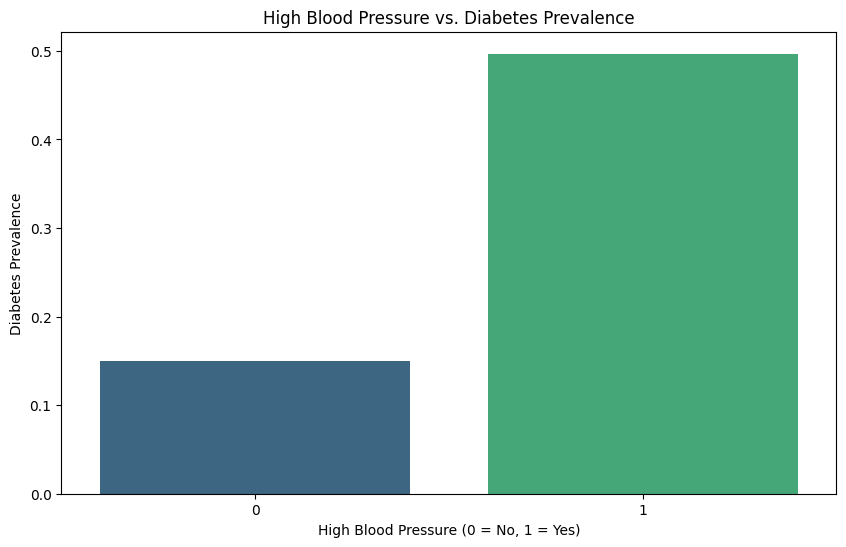

In [57]:
highbp_diabetes = Final_df.groupby('HighBP')['Diabetes_012'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=highbp_diabetes.index, y=highbp_diabetes.values, palette='viridis')
plt.title('High Blood Pressure vs. Diabetes Prevalence')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Diabetes Prevalence')
plt.show()

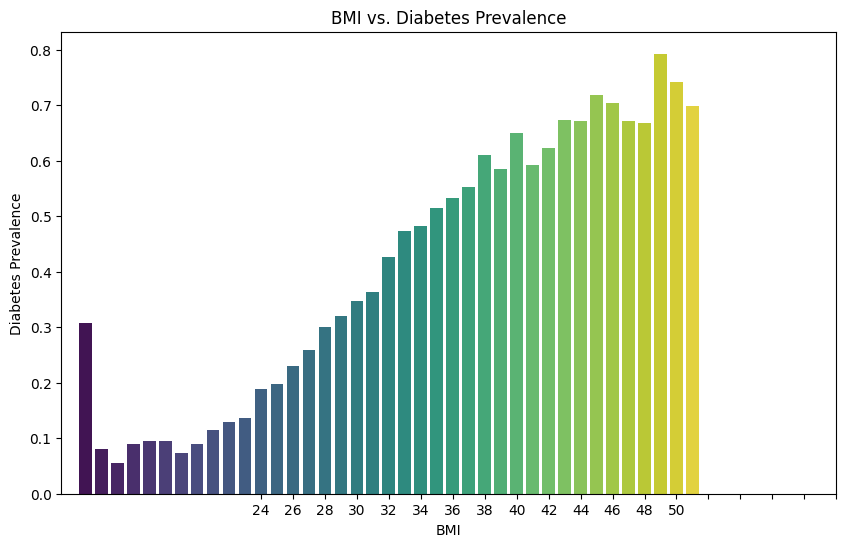

In [28]:
bmi_diabetes = Final_df.groupby('BMI')['Diabetes_012'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='BMI', y='Diabetes_012', data=bmi_diabetes, palette='viridis', hue='BMI', dodge=False, legend=False)
plt.title('BMI vs. Diabetes Prevalence')
plt.xlabel('BMI')
plt.ylabel('Diabetes Prevalence')
plt.xticks(ticks=np.arange(12, 50, 2))
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_8800\1856288268.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Physical Activity', y='Prevalence Rate', data=physactivity_prevalence, palette='viridis')


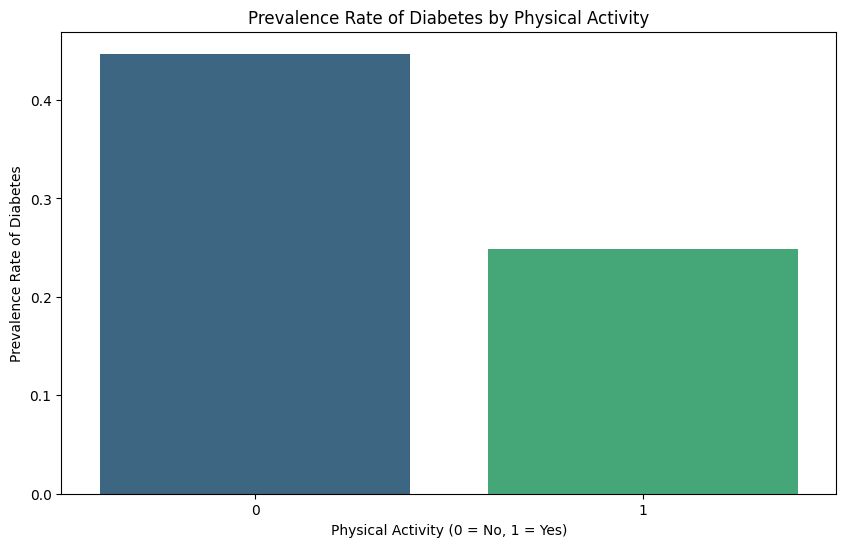

In [37]:
# Calculate the prevalence rate of diabetes for individuals with and without physical activity
physactivity_prevalence = df.groupby('PhysActivity')['Diabetes_012'].mean().reset_index()

# Rename columns for clarity
physactivity_prevalence.columns = ['Physical Activity', 'Prevalence Rate']

# Bar plot: Physical Activity vs. Prevalence Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Physical Activity', y='Prevalence Rate', data=physactivity_prevalence, palette='viridis')
plt.title('Prevalence Rate of Diabetes by Physical Activity')
plt.xlabel('Physical Activity (0 = No, 1 = Yes)')
plt.ylabel('Prevalence Rate of Diabetes')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_8800\749417890.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fruit Consumption', y='Prevalence Rate', data=fruit_prevalence, palette='viridis')


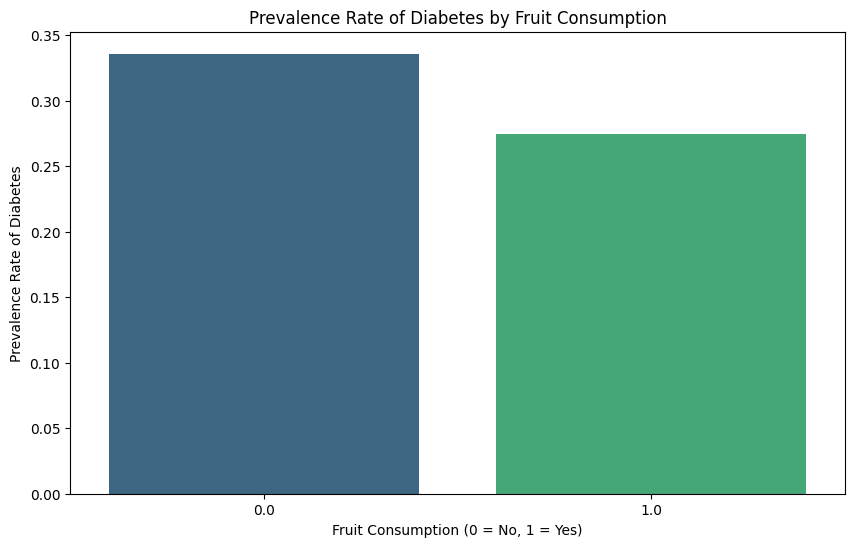

In [41]:
# Calculate the prevalence rate of diabetes for individuals with and without fruit consumption
fruit_prevalence = df.groupby('Fruits')['Diabetes_012'].mean().reset_index()

# Rename columns for clarity
fruit_prevalence.columns = ['Fruit Consumption', 'Prevalence Rate']

# Bar plot: Fruit Consumption vs. Prevalence Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Fruit Consumption', y='Prevalence Rate', data=fruit_prevalence, palette='viridis')
plt.title('Prevalence Rate of Diabetes by Fruit Consumption')
plt.xlabel('Fruit Consumption (0 = No, 1 = Yes)')
plt.ylabel('Prevalence Rate of Diabetes')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_8800\13110562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_diabetes.index, y=stroke_diabetes.values, palette='viridis')


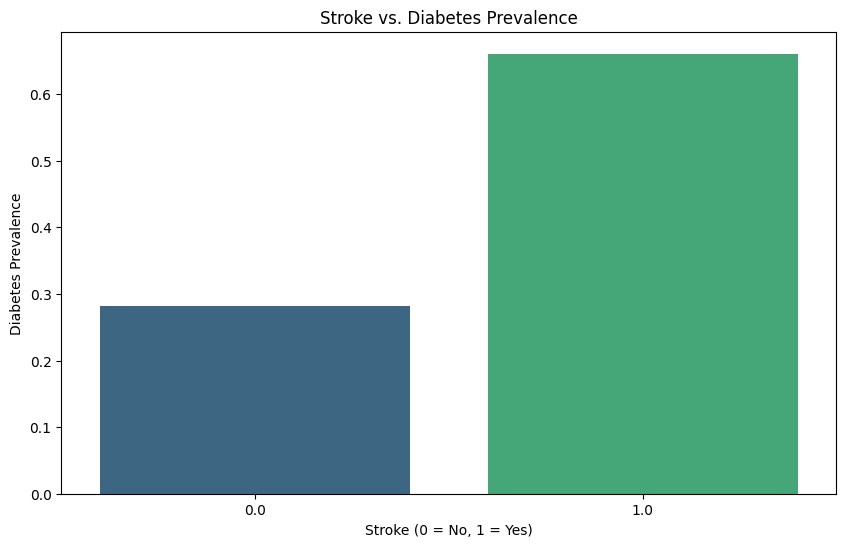

In [43]:
stroke_diabetes = df.groupby('Stroke')['Diabetes_012'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=stroke_diabetes.index, y=stroke_diabetes.values, palette='viridis')
plt.title('Stroke vs. Diabetes Prevalence')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Diabetes Prevalence')
plt.show()



C:\Users\Ped\AppData\Local\Temp\ipykernel_8800\4090527608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heart_disease_diabetes.index, y=heart_disease_diabetes.values, palette='viridis')


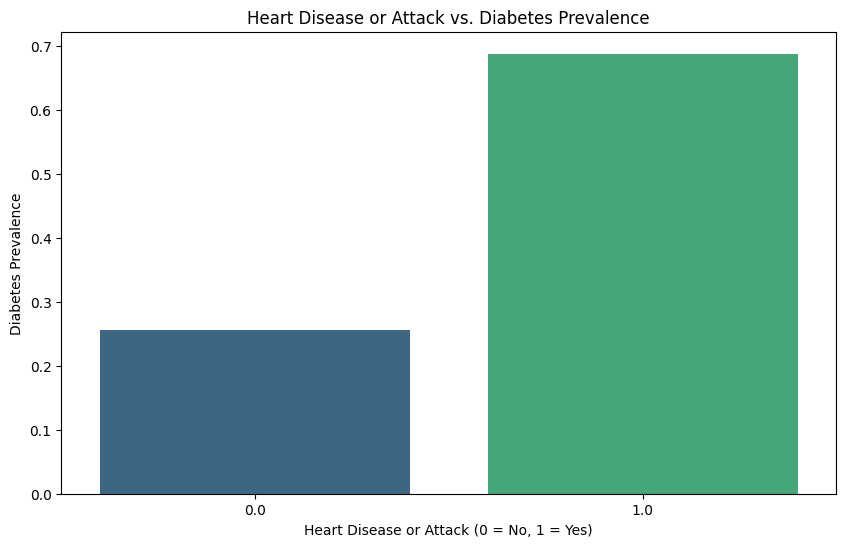

In [42]:
heart_disease_diabetes = df.groupby('HeartDiseaseorAttack')['Diabetes_012'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=heart_disease_diabetes.index, y=heart_disease_diabetes.values, palette='viridis')
plt.title('Heart Disease or Attack vs. Diabetes Prevalence')
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)')
plt.ylabel('Diabetes Prevalence')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_15048\1593363170.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcohol_diabetes.index, y=alcohol_diabetes.values, palette='viridis')


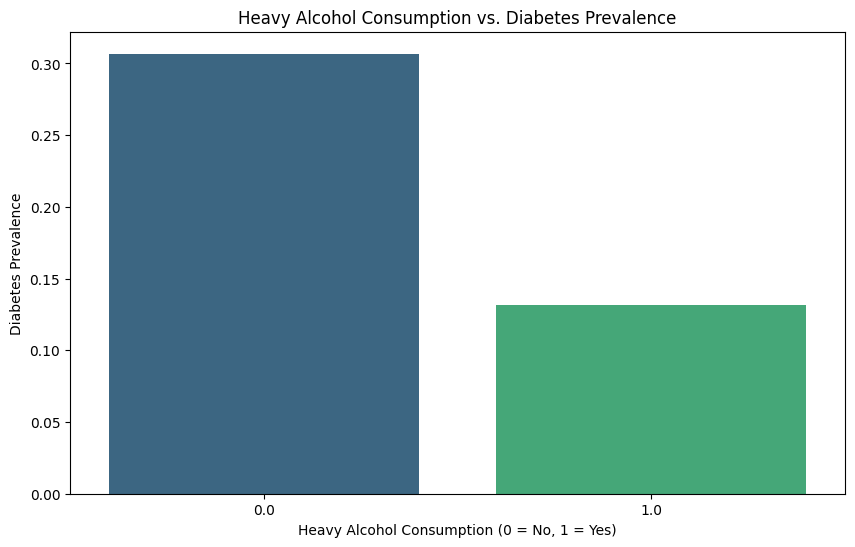

In [69]:
alcohol_diabetes = df.groupby('HvyAlcoholConsump')['Diabetes_012'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=alcohol_diabetes.index, y=alcohol_diabetes.values, palette='viridis')
plt.title('Heavy Alcohol Consumption vs. Diabetes Prevalence')
plt.xlabel('Heavy Alcohol Consumption (0 = No, 1 = Yes)')
plt.ylabel('Diabetes Prevalence')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_15048\1718132123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_diabetes.index, y=education_diabetes.values, palette='viridis')


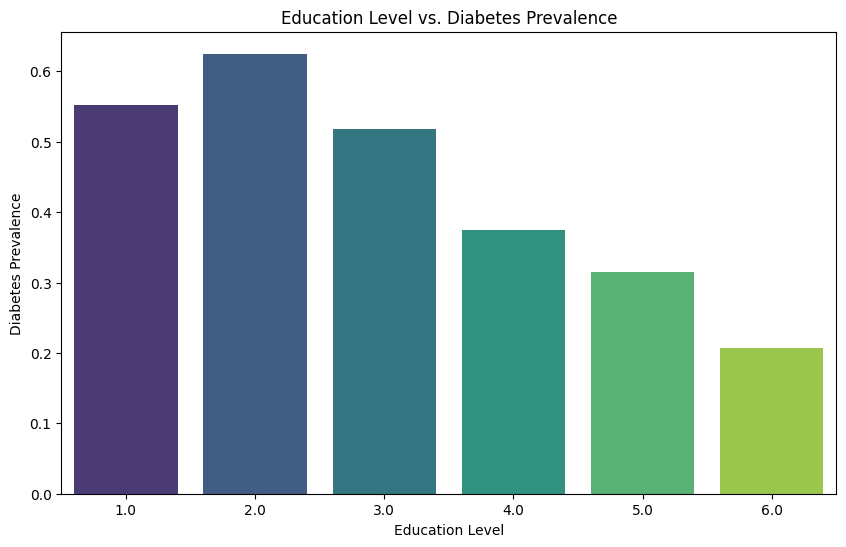

In [68]:
education_diabetes = df.groupby('Education')['Diabetes_012'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=education_diabetes.index, y=education_diabetes.values, palette='viridis')
plt.title('Education Level vs. Diabetes Prevalence')
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_15048\1399614309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diffwalk_diabetes.index, y=diffwalk_diabetes.values, palette='viridis')


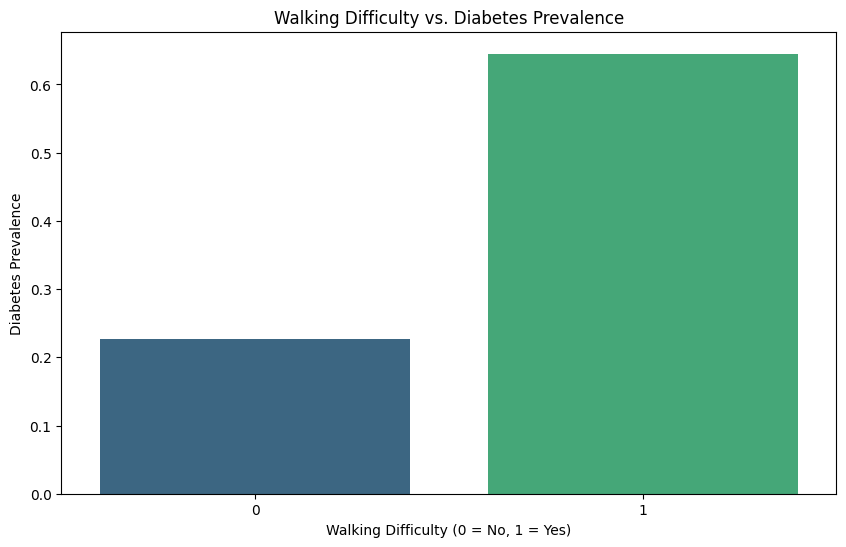

In [67]:
diffwalk_diabetes = cdf.groupby('DiffWalk')['Diabetes_012'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=diffwalk_diabetes.index, y=diffwalk_diabetes.values, palette='viridis')
plt.title('Walking Difficulty vs. Diabetes Prevalence')
plt.xlabel('Walking Difficulty (0 = No, 1 = Yes)')
plt.ylabel('Diabetes Prevalence')
plt.show()

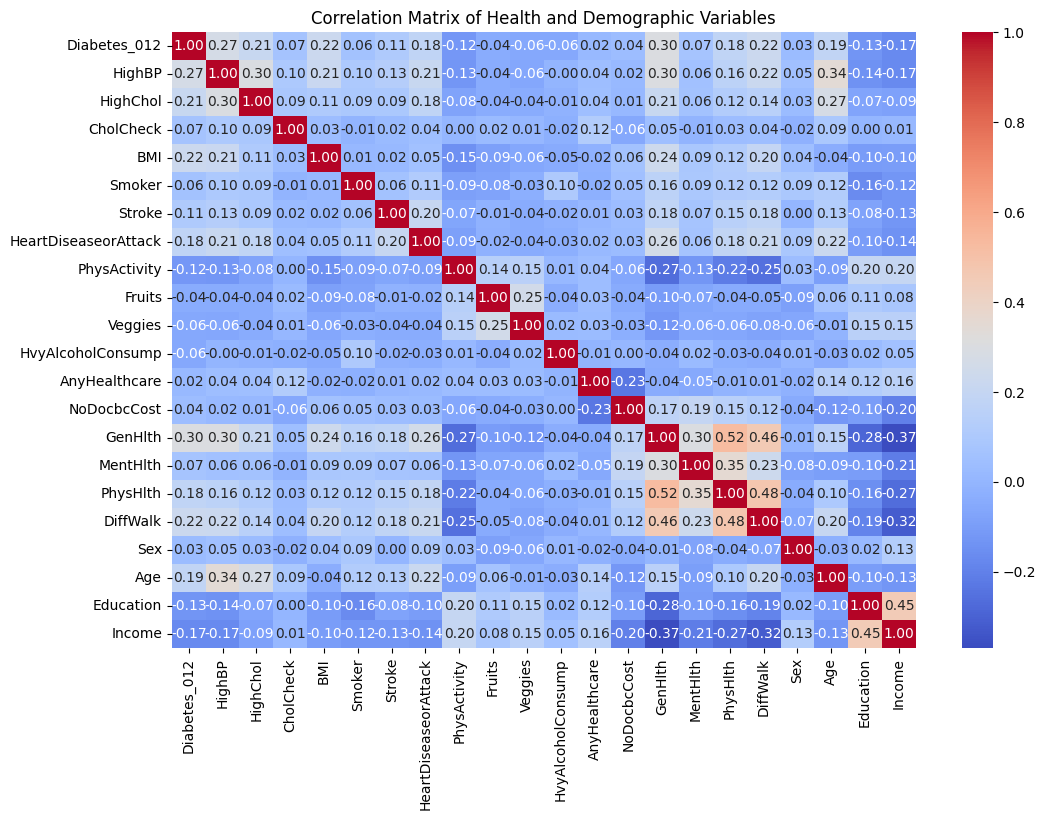

In [ ]:
correlation_matrix = cdf.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Health and Demographic Variables')
plt.show()

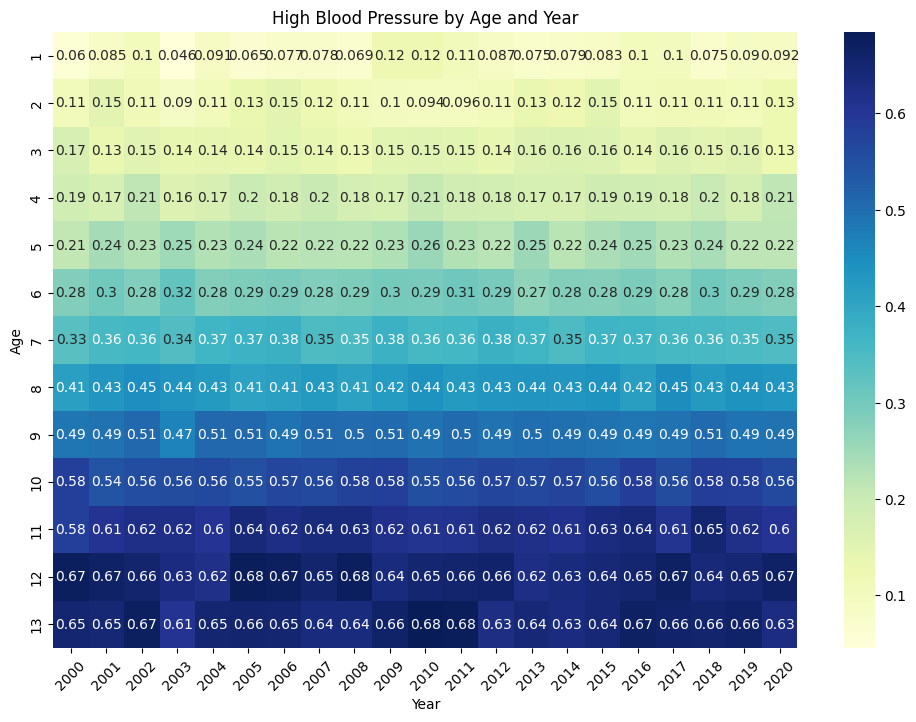

In [117]:

pivot_table = cdf.pivot_table(values='HighBP', index='Age', columns='Year', aggfunc='mean')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('High Blood Pressure by Age and Year')
plt.xlabel('Year')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

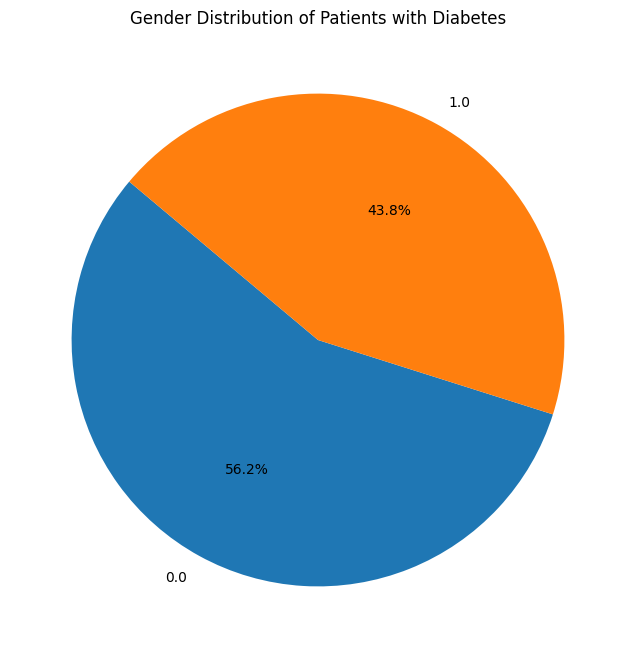

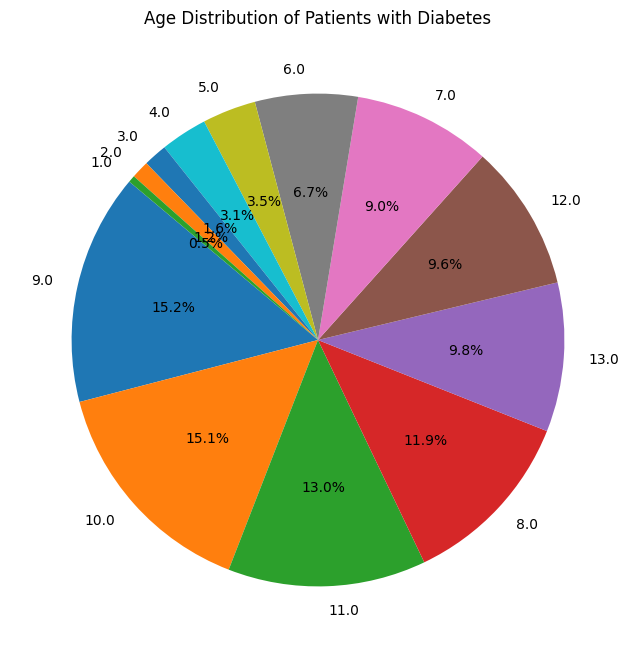

In [29]:
gender_counts = df[df['Diabetes_012'] == 1]['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Patients with Diabetes')
plt.show()

age_counts = df[df['Diabetes_012'] == 1]['Age'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution of Patients with Diabetes')
plt.show()

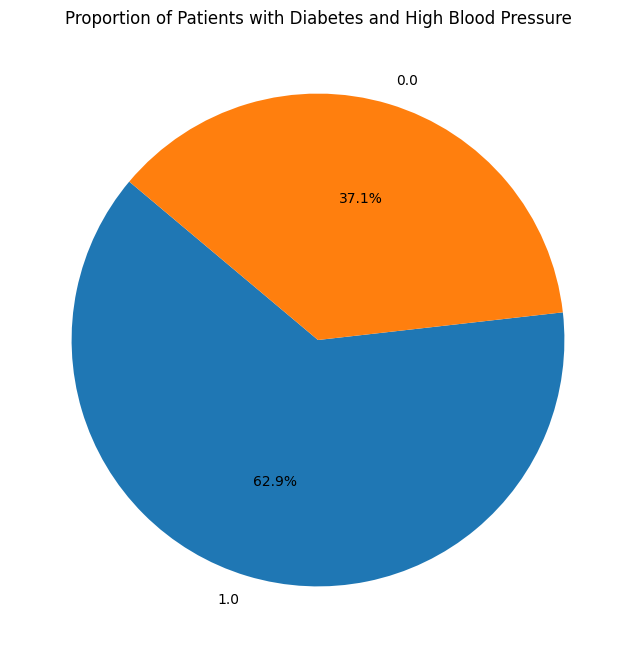

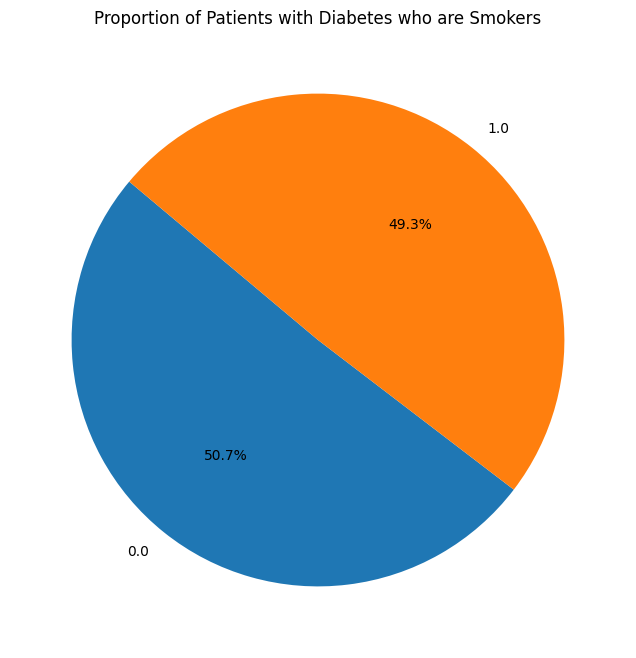

In [26]:
highbp_counts = df[df['Diabetes_012'] == 1]['HighBP'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(highbp_counts, labels=highbp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients with Diabetes and High Blood Pressure')
plt.show()

smoker_counts = df[df['Diabetes_012'] == 1]['Smoker'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients with Diabetes who are Smokers')
plt.show()

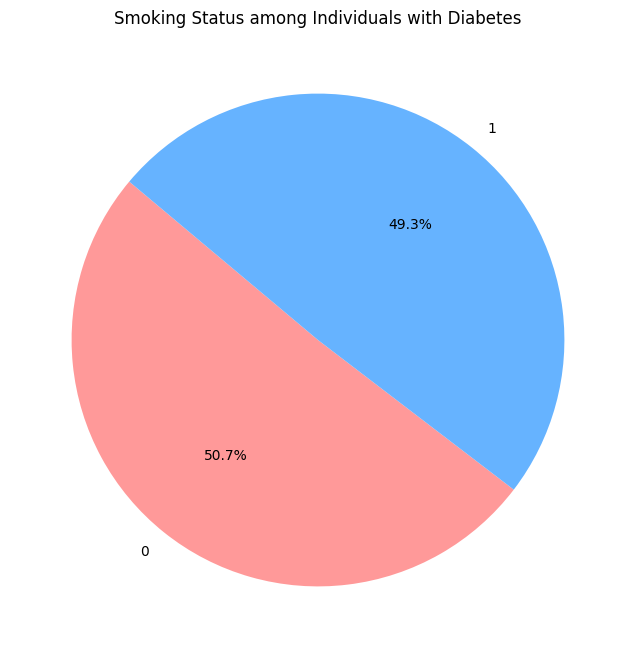

In [119]:
smoker_counts = cdf[cdf['Diabetes_012'] == 1]['Smoker'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Smoking Status among Individuals with Diabetes')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_15048\373346145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_diabetes.index, y=income_diabetes.values, palette='viridis')


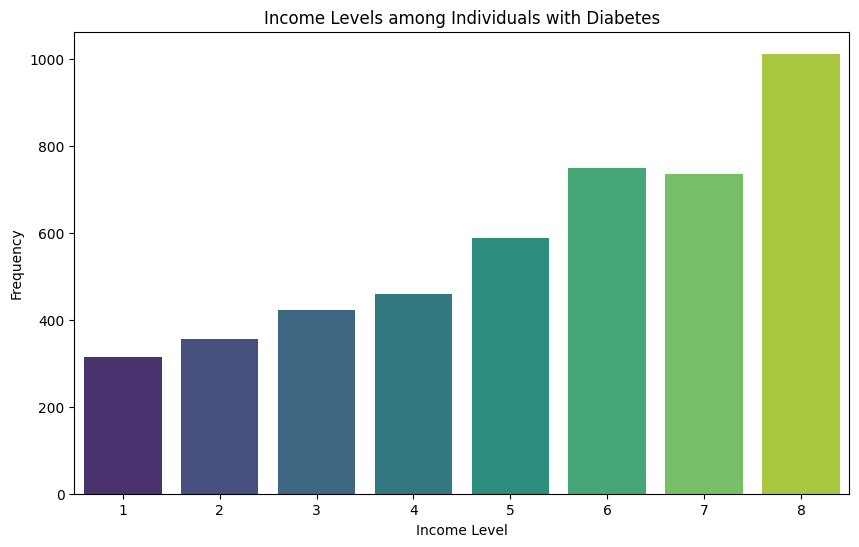

In [121]:
income_diabetes = cdf[cdf['Diabetes_012'] == 1]['Income'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=income_diabetes.index, y=income_diabetes.values, palette='viridis')
plt.title('Income Levels among Individuals with Diabetes')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_15676\1615314646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='MentHlth', y='Diabetes_012', data=df, palette='Set2')


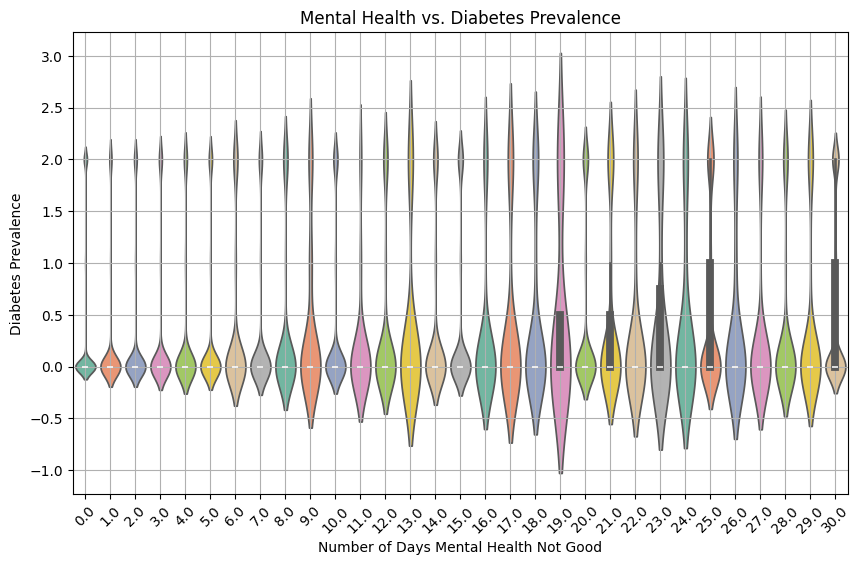

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='MentHlth', y='Diabetes_012', data=df, palette='Set2')
plt.title('Mental Health vs. Diabetes Prevalence')
plt.xlabel('Number of Days Mental Health Not Good')
plt.xticks(rotation=45)
plt.ylabel('Diabetes Prevalence')
plt.grid(True)
plt.show()

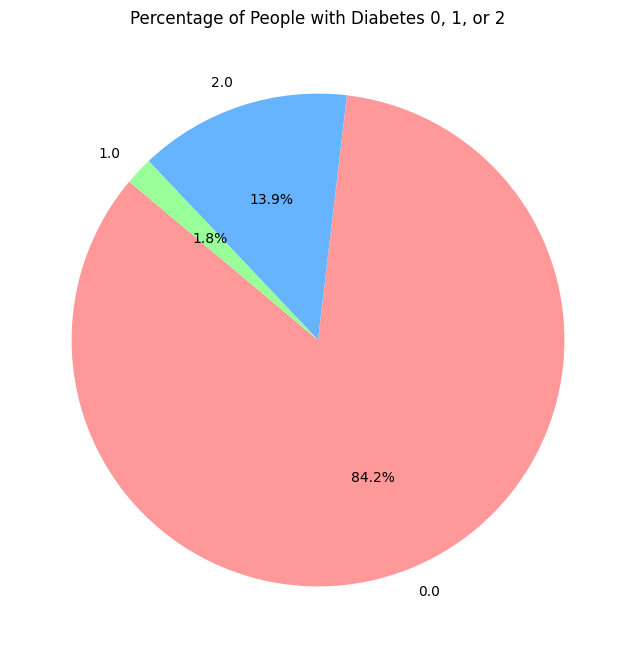

In [28]:
diabetes_counts = df['Diabetes_012'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Percentage of People with Diabetes 0, 1, or 2')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_15676\2748926496.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Behavior', y=0, data=behavior_diabetes, palette='viridis')


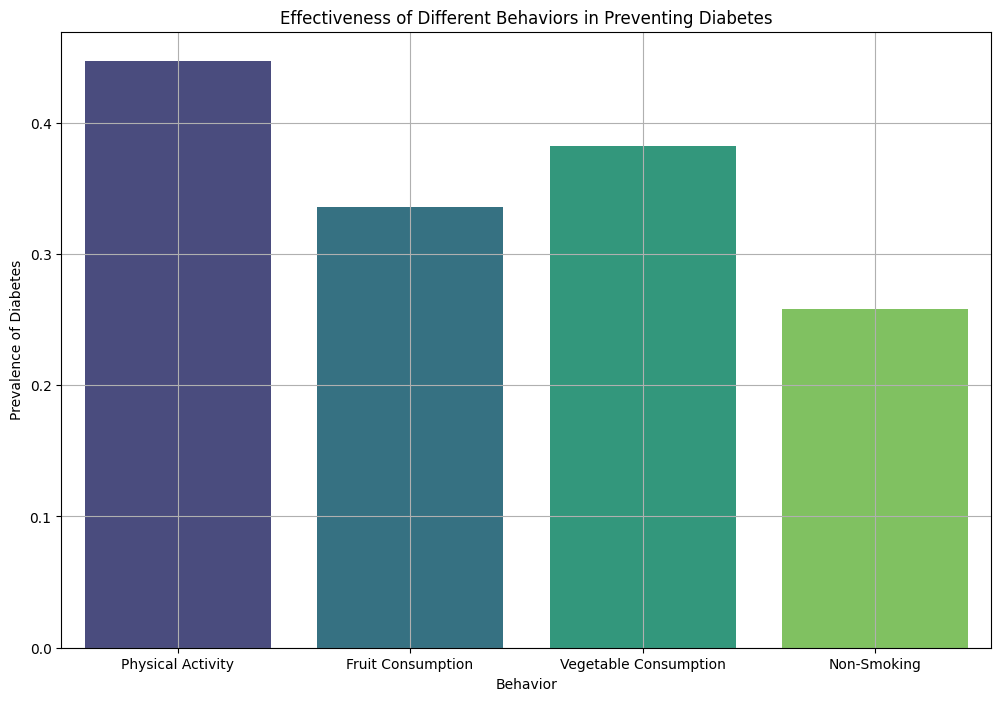

In [35]:
physactivity_diabetes = df.groupby('PhysActivity')['Diabetes_012'].mean().rename('Physical Activity')
fruits_diabetes = df.groupby('Fruits')['Diabetes_012'].mean().rename('Fruit Consumption')
veggies_diabetes = df.groupby('Veggies')['Diabetes_012'].mean().rename('Vegetable Consumption')
smoker_diabetes = df.groupby('Smoker')['Diabetes_012'].mean().rename('Non-Smoking')

behavior_diabetes = pd.DataFrame({
    'Physical Activity': physactivity_diabetes,
    'Fruit Consumption': fruits_diabetes,
    'Vegetable Consumption': veggies_diabetes,
    'Non-Smoking': smoker_diabetes
}).T


behavior_diabetes.index = ['Physical Activity', 'Fruit Consumption', 'Vegetable Consumption', 'Non-Smoking']

behavior_diabetes = behavior_diabetes.reset_index().rename(columns={'index': 'Behavior'})
plt.figure(figsize=(12, 8))
sns.barplot(x='Behavior', y=0, data=behavior_diabetes, palette='viridis')
plt.title('Effectiveness of Different Behaviors in Preventing Diabetes')
plt.xlabel('Behavior')
plt.ylabel('Prevalence of Diabetes')
plt.show()

C:\Users\Ped\AppData\Local\Temp\ipykernel_9548\2998032322.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk Factor', y=0, data=risk_factor_diabetes, palette='viridis')


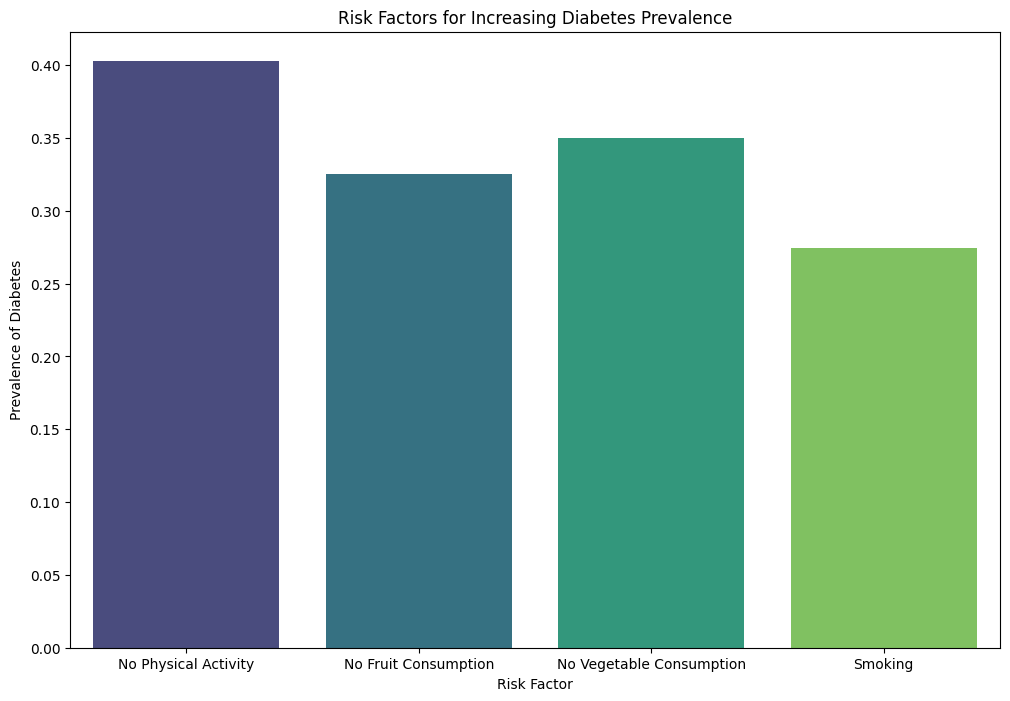

In [59]:
no_physactivity_diabetes = Final_df.groupby('PhysActivity')['Diabetes_012'].mean().rename('Physical Activity')
no_fruits_diabetes = Final_df.groupby('Fruits')['Diabetes_012'].mean().rename('Fruit Consumption')
no_veggies_diabetes = Final_df.groupby('Veggies')['Diabetes_012'].mean().rename('Vegetable Consumption')
smoker_diabetes = Final_df.groupby('Smoker')['Diabetes_012'].mean().rename('Smoking')


risk_factor_diabetes = pd.DataFrame({
    'No Physical Activity': no_physactivity_diabetes,
    'No Fruit Consumption': no_fruits_diabetes,
    'No Vegetable Consumption': no_veggies_diabetes,
    'Smoking': smoker_diabetes
}).T

risk_factor_diabetes.index = ['No Physical Activity', 'No Fruit Consumption', 'No Vegetable Consumption', 'Smoking']


risk_factor_diabetes = risk_factor_diabetes.reset_index().rename(columns={'index': 'Risk Factor'})


plt.figure(figsize=(12, 8))
sns.barplot(x='Risk Factor', y=0, data=risk_factor_diabetes, palette='viridis')
plt.title('Risk Factors for Increasing Diabetes Prevalence')
plt.xlabel('Risk Factor')
plt.ylabel('Prevalence of Diabetes')
plt.show()